# Analysis of pbmc8k

In this notebook I will demonstrate the analysis of a single cell data set consisting of ~8000 peripheral blood mononuclear cells (`pbmc8k`). The data were generated by 10X genomics from a healthy human donor, and it has become a popular "toy" data set in the single cell community. `pbmc8k` is included in the default adobo installation. Start your Python 3 interpreter by typing `python3` and load the adobo package:

In [1]:
import adobo as ad

adobo version 0.2.18. Documentation: https://oscar-franzen.github.io/adobo/


Load the test data set (this might take a few minutes). The option `bundled=True` tells adobo that the specifies file is a test data set installed together with adobo. Thus, when loading your own data this parameter should be `False`.

In [2]:
# load the data
exp = ad.IO.load_from_file('pbmc8k.mat.gz',
                           output_file='pbmc8k.joblib',
                           bundled=True,
                           sparse=True,
                           verbose=True)

Using a sparse matrix structure, please wait
Memory usage of loaded data: 135.16 MB
33,694 genes and 8,381 cells were loaded
loading took 0.9 minutes


`exp` is your adobo object. Operations are applied on this object and results are stored in it. We don't need to explicitly remember to store output in variables - adobo takes care of it.

## Plot number of reads per cell

<Figure size 432x288 with 0 Axes>

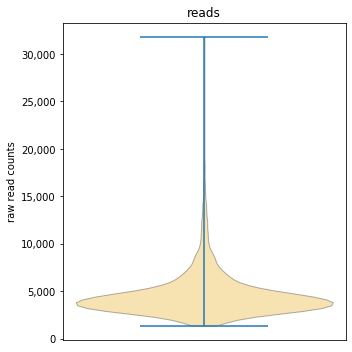

In [3]:
ad.plotting.overall(exp, how='violin')

<Figure size 432x288 with 0 Axes>

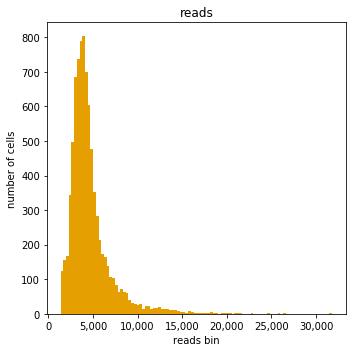

In [4]:
ad.plotting.overall(exp, how='histogram', bin_size=100)

## Plot number of reads per cell vs. number of detected genes

<Figure size 432x288 with 0 Axes>

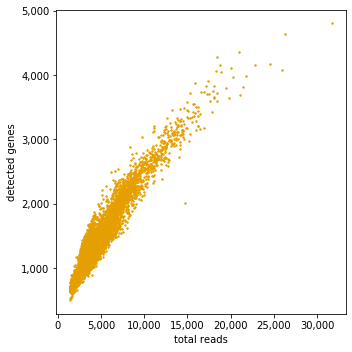

In [5]:
ad.plotting.overall_scatter(exp)

## Filtering

In [7]:
r = ad.preproc.find_mitochondrial_genes(exp, verbose=True)

0 mitochondrial genes detected


In [3]:
ad.preproc.simple_filter(exp, minreads=1500, minexpgenes=0.001, verbose=True)

32 cells and 17993 genes were removed


(32, 17993)

In [11]:
r = ad.preproc.find_ercc(exp, verbose=True)

0 ercc spikes detected


## Normalize data

In [4]:
ad.normalize.norm(exp, method='standard')

## Find highly variable genes

In [5]:
ad.hvg.find_hvg(exp, method='seurat', ngenes=1000, verbose=True)

Running on the standard normalization


## Run PCA decomposition

To find a number of linearly independent principal components. Default number of PCs to find is 75.

In [6]:
ad.dr.pca(exp, verbose=True)

Running PCA (method=irlb) on the standard normalization (dimensions 1000x8349)


### Examine the gene loadings of the components

## Run non-linear dimensionality reduction

In [16]:
# first run t-SNE
ad.dr.tsne(exp, verbose=True)

Running tSNE (perplexity 30) on the standard normalization
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8349 samples in 0.032s...
[t-SNE] Computed neighbors for 8349 samples in 4.459s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8349
[t-SNE] Computed conditional probabilities for sample 2000 / 8349
[t-SNE] Computed conditional probabilities for sample 3000 / 8349
[t-SNE] Computed conditional probabilities for sample 4000 / 8349
[t-SNE] Computed conditional probabilities for sample 5000 / 8349
[t-SNE] Computed conditional probabilities for sample 6000 / 8349
[t-SNE] Computed conditional probabilities for sample 7000 / 8349
[t-SNE] Computed conditional probabilities for sample 8000 / 8349
[t-SNE] Computed conditional probabilities for sample 8349 / 8349
[t-SNE] Mean sigma: 2.476310
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.299889
[t-SNE] KL divergence after 2000 iterations: 2.165641


In [17]:
# we will also run UMAP
ad.dr.umap(exp, verbose=True)

Running UMAP on the standard normalization
UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Thu Oct 24 15:05:26 2019 Finding Nearest Neighbors
Thu Oct 24 15:05:26 2019 Building RP forest with 10 trees
Thu Oct 24 15:05:26 2019 NN descent for 13 iterations
	 0  /  13
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
Thu Oct 24 15:05:29 2019 Finished Nearest Neighbor Search
Thu Oct 24 15:05:31 2019 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  / 

## Cluster

In [18]:
# Use the Leiden algorithnm
ad.clustering.generate(exp, clust_alg='leiden', verbose=True)

Running clustering on the standard normalization
75.41% (n=1,177,136) of links pruned
{6: 431, 0: 1329, 2: 830, 1: 1275, 4: 715, 3: 807, 9: 316, 7: 415, 14: 187, 12: 254, 13: 234, 11: 254, 5: 486, 10: 314, 8: 342, 20: 5, 49: 1, 17: 14, 15: 64, 19: 5, 16: 15, 18: 14, 27: 1, 31: 1, 22: 2, 46: 1, 25: 2, 30: 1, 32: 1, 35: 1, 37: 1, 51: 1, 36: 1, 33: 1, 28: 1, 44: 1, 56: 1, 34: 1, 42: 1, 54: 1, 24: 2, 50: 1, 47: 1, 45: 1, 21: 3, 52: 1, 29: 1, 23: 2, 40: 1, 53: 1, 41: 1, 48: 1, 39: 1, 26: 2, 43: 1, 55: 1, 38: 1}
